Repair

# Cleaning

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 

In [2]:
#read the file
df = pd.read_csv("german_credit.csv")


In [3]:
df['status'] = df['status'].str.replace('... >= 200 DM / salary for at least 1 year', '0')
df['status'] = df['status'].str.replace('no checking account', '1')
df['status'] = df['status'].str.replace('... < 0 DM', '2')
df['status'] = df['status'].str.replace('0<= ... < 200 DM', '3')

C:\Users\dideu\AppData\Local\Temp\ipykernel_13292\1885772212.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['status'] = df['status'].str.replace('... >= 200 DM / salary for at least 1 year', '0')
C:\Users\dideu\AppData\Local\Temp\ipykernel_13292\1885772212.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['status'] = df['status'].str.replace('... < 0 DM', '2')
C:\Users\dideu\AppData\Local\Temp\ipykernel_13292\1885772212.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['status'] = df['status'].str.replace('0<= ... < 200 DM', '3')


In [4]:
df['installment_rate'] = df['installment_rate'].str.replace('< 20', '0')
df['installment_rate'] = df['installment_rate'].str.replace('20 <= ... < 25', '1')
df['installment_rate'] = df['installment_rate'].str.replace('25 <= ... < 35', '2')
df['installment_rate'] = df['installment_rate'].str.replace('>= 35', '3')

C:\Users\dideu\AppData\Local\Temp\ipykernel_13292\4242266004.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['installment_rate'] = df['installment_rate'].str.replace('20 <= ... < 25', '1')
C:\Users\dideu\AppData\Local\Temp\ipykernel_13292\4242266004.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['installment_rate'] = df['installment_rate'].str.replace('25 <= ... < 35', '2')


In [5]:
# Replace the values in the target column with string '0' and '1'.
df['employment_duration'] = df['employment_duration'].str.replace('< 1 yr', '1')  
df['employment_duration'] = df['employment_duration'].str.replace('unemployed' , '0') 
df['employment_duration'] = df['employment_duration'].str.replace('1 <= ... < 4 yrs', '2')
df['employment_duration'] = df['employment_duration'].str.replace('4 <= ... < 7 yrs', '3')
df['employment_duration'] = df['employment_duration'].str.replace('>= 7 yrs', '4')

C:\Users\dideu\AppData\Local\Temp\ipykernel_13292\1649882530.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['employment_duration'] = df['employment_duration'].str.replace('1 <= ... < 4 yrs', '2')
C:\Users\dideu\AppData\Local\Temp\ipykernel_13292\1649882530.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['employment_duration'] = df['employment_duration'].str.replace('4 <= ... < 7 yrs', '3')


In [6]:
df['present_residence'] = df['present_residence'].str.replace('>= 7 yrs', '0')
df['present_residence'] = df['present_residence'].str.replace('4 <= ... < 7 yrs', '1')
df['present_residence'] = df['present_residence'].str.replace('1 <= ... < 4 yrs', '2')
df['present_residence'] = df['present_residence'].str.replace('< 1 yr', '3')

C:\Users\dideu\AppData\Local\Temp\ipykernel_13292\434360399.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['present_residence'] = df['present_residence'].str.replace('4 <= ... < 7 yrs', '1')
C:\Users\dideu\AppData\Local\Temp\ipykernel_13292\434360399.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['present_residence'] = df['present_residence'].str.replace('1 <= ... < 4 yrs', '2')


In [7]:
df['installment_rate'] = df['installment_rate'].astype(int)
df['employment_duration'] = df['employment_duration'].astype(int)
df['present_residence'] = df['present_residence'].astype(int)
df['status'] = df['status'].astype(int)

In [8]:
# Replace the values in the target column with string '0' and '1'.
df['credit_risk'] = df['credit_risk'].str.replace('bad', '0')  
df['credit_risk'] = df['credit_risk'].str.replace('good', '1')   

# Convert to integer
df['credit_risk'] = df['credit_risk'].astype(int)

# Plots for creating feature importance plot

In [9]:
auc_df = pd.read_excel('Performance_metrics\model_perf_metrics_mean_of_iterations_10_20_30_40_50.xlsx')
auc_onlycf_df = pd.read_excel('Performance_metrics\model_perf_metrics_mean_of_iterations_only_with_cfs_10_20_30_40_50.xlsx')

In [10]:
auc_df.head()

,Unnamed: 0,Model,Iteration,Sample Size,CF Num,X_fit Size,F1 (%),F1 (%)_std,AUC (%),AUC (%)_std
0,0,RF_default_mean_of_iterations,5,0,0,700,0.856867,0.012988,0.696409,0.021716
1,1,LR_default_mean_of_iterations,5,0,0,700,0.827907,0.000000,0.689574,0.000000
2,2,LR_sample:100_cf:1_mean_of_5_iterations,5,100,1,800,0.833170,0.003340,0.694979,0.004185
3,3,LR_sample:100_cf:2_mean_of_5_iterations,5,100,2,900,0.825458,0.006017,0.685940,0.006388
4,4,LR_sample:200_cf:1_mean_of_5_iterations,5,200,1,900,0.832615,0.006406,0.694500,0.009814


In [11]:
# Get the AUC score for the LR default model
lr_default_auc =  auc_df[auc_df['Model'].str.startswith('LR_default')]['AUC (%)'].iloc[0]
auc_scores = auc_df['AUC (%)'][2:].tolist()

rf_default_auc =  auc_df[auc_df['Model'].str.startswith('RF_default')]['AUC (%)'].iloc[0]



In [12]:
from scipy.stats import ks_2samp
import pandas as pd

def ks_test_all_features(original_df, cf_df):
    results = {}
    # Iterate over columns in the original dataframe
    for column in original_df.columns:
        # Check if the column exists in the counterfactual dataframe and both columns are not empty
            # Apply the KS test
        stat, p_value = ks_2samp(original_df[column].dropna(), cf_df[column].dropna())
        results[column] = {'KS Statistic': stat}

    return results


In [13]:
list_1 = [100,200,296]
list_2 = [1, 2]

list_3 = [1,2,3,4,5] #iterations

In [14]:
ks_results_list = [] 
for i in list_1:
    for t in list_2:
        for z in list_3:
            df_cf = pd.read_csv('Generated_CFs/cf_df_{}_{}_{}.csv'.format(i,t, z), index_col=0)
            start_index = 1 + len(df)  # Calculate the starting index
            new_index = range(start_index, start_index + len(df_cf))  # Create a new index starting from start_index
            df_cf_reset = df_cf.copy()  # Create a copy of the DataFrame
            df_cf_reset.index = new_index  # Set the new index
            df_cf = df_cf_reset # Assign the new indexed DataFrame to the original DataFrame
            ks_results = ks_test_all_features(df, df_cf)
            ks_results_df = pd.DataFrame(ks_results).T
            mean_ks_statistic = ks_results_df['KS Statistic'].mean()
            ks_results_list.append(mean_ks_statistic)

getting the average of every iteration

In [15]:
# Create a new list that gets the means of every 5 number, bc its 5 iterations
new_list = [(ks_results_list[i] + ks_results_list[i + 1]+ ks_results_list[i + 2] + ks_results_list[i + 3] + ks_results_list[i + 4] ) / 5 for i in range(0, len(ks_results_list) - 1, 5)]


# Print the new list
print(new_list)
ks_results_list = new_list.copy()

[0.07015238095238095, 0.07078095238095236, 0.06900952380952381, 0.06759523809523811, 0.060121235521235515, 0.06168738738738737]


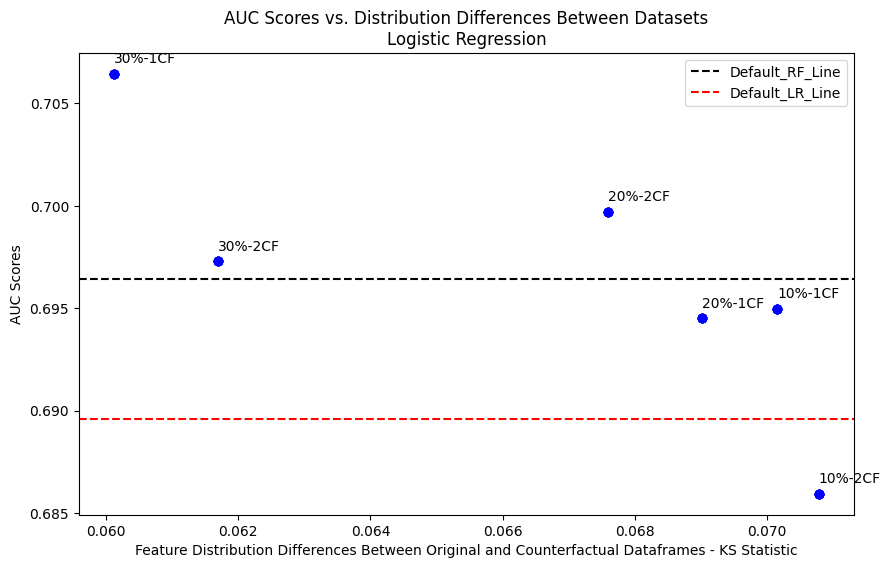

In [16]:

labels = ['10%-1CF', '10%-2CF', '20%-1CF', '20%-2CF', '30%-1CF', '30%-2CF']

# Show the plot
plt.figure(figsize=(10, 6))

# Plotting AUC differences
for i, label in enumerate(labels):
    plt.scatter(ks_results_list, auc_scores, color='blue')  # You can customize the color and marker
    plt.annotate(label, (ks_results_list[i], auc_scores[i]),
                 textcoords="offset points", xytext=(0,8), ha='left')


plt.axhline(y=rf_default_auc, color='k', linestyle='--', label="Default_RF_Line")  # Plot RF_line as a horizontal line
plt.axhline(y=lr_default_auc, color='r', linestyle='--', label="Default_LR_Line")  # Plot RF_line as a horizontal line

# Add labels, title, and legend
plt.title('AUC Scores vs. Distribution Differences Between Datasets\nLogistic Regression')
plt.xlabel('Feature Distribution Differences Between Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Scores')
plt.legend()

# Show the plot
plt.show()


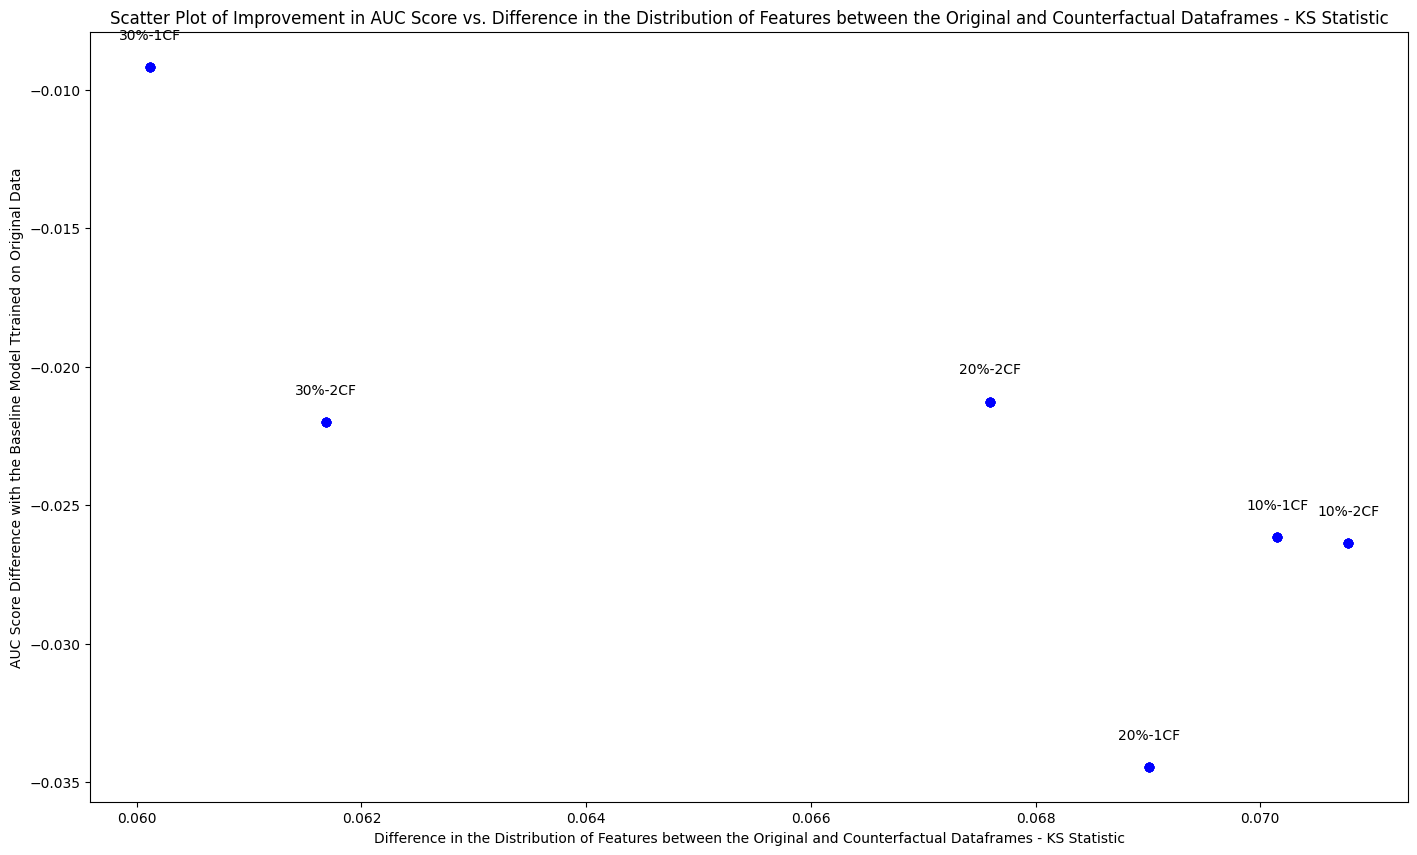

In [23]:


# Show the plot
plt.figure(figsize=(17, 10))
# Plotting
for i, label in enumerate(labels):

    plt.scatter(ks_results_list, auc_diff_cf, color='blue')  # You can customize the color and marker.
    plt.annotate(label, (ks_results_list[i], auc_diff_cf[i]),
                 textcoords="offset points", xytext=(0,20), ha='center')
plt.title('Scatter Plot of Improvement in AUC Score vs. Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.xlabel('Difference in the Distribution of Features between the Original and Counterfactual Dataframes - KS Statistic')
plt.ylabel('AUC Score Difference with the Baseline Model Ttrained on Original Data')
plt.show()